# Objective: Image classification for CIFAR10 small images

### Check and install dependent packages

In [86]:
#!pip show tensorflow
#!pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org tensorflow
#!pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org opencv-python

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn import metrics

### Load the images data using keras' prebuilt load_data() function

In [24]:
#https://keras.io/api/datasets/cifar10/

cifar = tf.keras.datasets.cifar10

(x_train_o, y_train_o), (x_test_o, y_test_o) = cifar.load_data()

x_train_o.shape, x_test_o.shape, y_train_o.shape, y_test_o.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

### Plot sample images

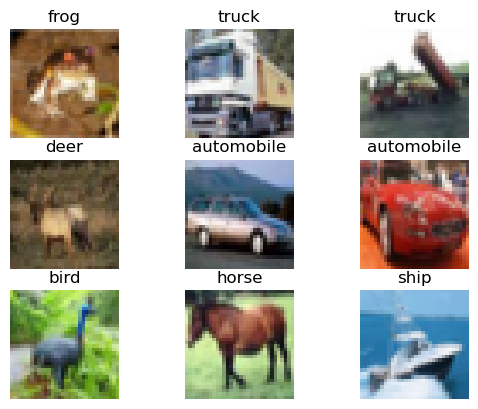

In [97]:
names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.title(names[int(y_train_o[i])])
    plt.axis("off")
    plt.imshow(x_train_o[i])
plt.show()

In [41]:
x_train_o = x_train_o/255.0
x_test_o = x_test_o/255.0

In [42]:
nsamples, nx, ny, nrgb = x_train_o.shape
x_train = x_train_o.reshape (nsamples, nx*ny*nrgb)

x_train.shape

(50000, 3072)

In [43]:
nsamples, nx, ny, nrgb = x_test_o.shape
x_test = x_test_o.reshape (nsamples, nx*ny*nrgb)

In [44]:
model = RandomForestClassifier()

In [45]:
model.fit(x_train, np.ravel(y_train_o))

RandomForestClassifier()

### Measure the performance of the model

Accuracy: 0.4663

Classification Report: 
                precision    recall  f1-score   support

           0       0.55      0.57      0.56      1000
           1       0.51      0.55      0.53      1000
           2       0.37      0.33      0.35      1000
           3       0.34      0.29      0.31      1000
           4       0.39      0.39      0.39      1000
           5       0.41      0.37      0.39      1000
           6       0.47      0.55      0.50      1000
           7       0.52      0.45      0.48      1000
           8       0.58      0.61      0.60      1000
           9       0.48      0.56      0.52      1000

    accuracy                           0.47     10000
   macro avg       0.46      0.47      0.46     10000
weighted avg       0.46      0.47      0.46     10000



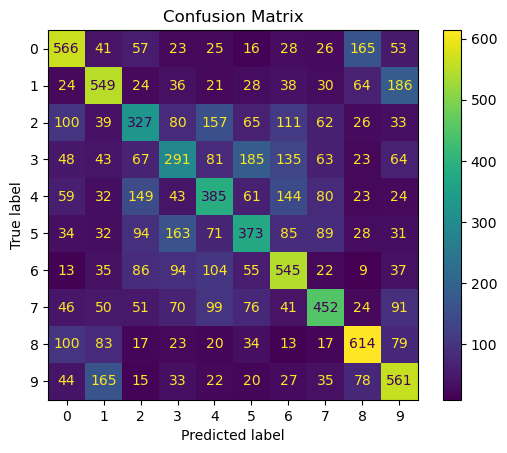

In [84]:
y_hat = model.predict(x_test)

#print(y_hat[:10])
#print(np.ravel(y_test_o)[:10])

print("Accuracy:", accuracy_score(y_test_o, y_hat))

print("\nClassification Report: \n ", classification_report(y_test_o, y_hat))

metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test_o, y_hat)).plot()
plt.title("Confusion Matrix")
plt.show()

#### 1. Precision: Percentage of correct positive predictions relative to total positive predictions.

#### 2. Recall: Percentage of correct positive predictions relative to total actual positives.

#### 3. F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model.

#####                                  F1 Score: 2 * (Precision * Recall) / (Precision + Recall)


### Q: Why do we need Confusion Matrix when Accuracy already measures the performance of the model?

### Time to put it to test

In [50]:
#CV2 is a powerful library for working with images in Python
import cv2

In [55]:
#Download an image of your choice that is either an 'airplane', 'automobile', 'bird', 
#'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'and save it as 'put_it_to_test.jpg' in your working folder

test_img_o = cv2.imread('put_it_to_test.jpg')
test_img_o = cv2.resize(test_img_o, (32, 32))
nx, ny, nrgb = test_img_o.shape
test_img = test_img_o.reshape(1, (nx*ny*nrgb))

y_hat = model.predict(test_img)

print(names[y_hat[0]])

bird


# yay! So, did you get a YAY! or NAY?

# Assignment
### 1. Test the example with other ML Classification algorithms e.g. SVC, KNN, DecisionTree, NaiveBayes and compare the performance? Which one is better and why?

### 2. What is cross validation? Why is it used?

### 3. Load Diabities data from scikit-learn.org to predict diabities. Measure model performance. What techniques will help improve the performance?

### 4. Use MNIST Database to classify small images of digits. Test your model with digit images from external sources.